<a href="https://colab.research.google.com/github/MichalBalcerak/ML24-25/blob/main/Homework12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import urllib.request

### I started by defining 10 semantic classes, each containing 5 pairs of related words.

In [ ]:
semantic_classes = {
    "gender": [("king", "queen"), ("man", "woman"), ("doctor", "nurse"), ("prince", "princess"), ("brother", "sister")],
    "past_tense": [("bring","brought"), ("get", "got"), ("like","liked"), ("eat", "ate"), ("run", "ran")],
    "singular_plural": [("dog", "dogs"), ("cat", "cats"), ("car", "cars"), ("tree", "trees"), ("child", "children")],
    "country_capital": [("sweden", "stockholm"), ("portugal", "lisbon"), ("austria", "vienna"), ("norway", "oslo"), ("canada", "ottawa")],
    "comparative": [("big", "bigger"), ("small", "smaller"), ("fast", "faster"), ("strong", "stronger"), ("short", "shorter")],
    "superlative": [("good", "best"), ("bad", "worst"), ("weak", "weakest"), ("long", "longest"), ("smart", "smartest")],
    "job_workplace": [("teacher", "school"), ("librarian", "library"), ("farmer", "farm"), ("chef", "kitchen"), ("baker", "bakery")],
    "country_nationality": [("france", "french"), ("italy", "italian"), ("germany", "german"), ("spain", "spanish"), ("poland", "polish")],
    "object_container":[("water", "bottle"), ("tea", "teapot"), ("soup", "bowl"), ("coffee", "cup"), ("wine", "glass")],
    "proffesion_activity": [("singer", "singing"), ("writer", "writing"), ("painter", "painting"), ("dancer", "dancing"), ("driver", "driving")],
}

### I used word representation from GloVe [https://nlp.stanford.edu/projects/glove/](https://nlp.stanford.edu/projects/glove/).
I extracted embeddings for the words included in the dictionary above and saved them in a smaller file stored in my repository.

In [ ]:
url = "https://raw.githubusercontent.com/MichalBalcerak/ML24-25/main/embeddings.txt"
local_path = "embeddings.txt"
urllib.request.urlretrieve(url, local_path)


dim=300

target_words = set()
for pairs in semantic_classes.values():
    for a, b in pairs:
        target_words.add(a.lower())
        target_words.add(b.lower())

word_vectors = {}
with open(local_path, 'r', encoding='utf-8') as f:
      for line in f:
          parts = line.strip().split()
          word = parts[0].lower()
          if word in target_words:
              vector = np.array(parts[1:], dtype=np.float32)
              if len(vector) == dim:
                  word_vectors[word] = vector

### Then I defined functions for:
*   Global PCA (across all 100 words)
*   Global PCA (within each semantic class)
*   Local PCA (performed separately for each class)

In [ ]:
def plot_global_pca(word_vectors):
    words = list(word_vectors.keys())
    vectors = np.stack([word_vectors[w] for w in words])

    pca = PCA(n_components=2)
    reduced = pca.fit_transform(vectors)

    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        x, y = reduced[i]
        plt.scatter(x, y)
        plt.text(x + 0.01, y + 0.01, word, fontsize=9)
    plt.title("Global PCA – All 100 Words")
    plt.grid(True)
    plt.show()

In [ ]:
def plot_class_in_global_space(semantic_classes, word_vectors):
    words_all = list(word_vectors.keys())
    vectors_all = np.stack([word_vectors[w] for w in words_all])
    pca = PCA(n_components=2).fit(vectors_all)

    for class_name, pairs in semantic_classes.items():
        words = [w for pair in pairs for w in pair]
        vectors = [word_vectors[w] for w in words if w in word_vectors]
        reduced = pca.transform(vectors)

        plt.figure(figsize=(6, 5))
        for i, word in enumerate(words):
            x, y = reduced[i]
            plt.scatter(x, y)
            plt.text(x + 0.01, y + 0.01, word, fontsize=9)
        plt.title(f"Class in Global PCA: {class_name}")
        plt.grid(True)
        plt.show()

In [ ]:
def plot_local_pca(semantic_classes, word_vectors):
    for class_name, pairs in semantic_classes.items():
        words = [w for pair in pairs for w in pair]
        vectors = [word_vectors[w] for w in words if w in word_vectors]

        if len(vectors) < 2:
            continue  # pomijamy zbyt małe klasy

        pca = PCA(n_components=2).fit(vectors)
        reduced = pca.transform(vectors)

        plt.figure(figsize=(6, 5))
        for i, word in enumerate(words):
            x, y = reduced[i]
            plt.scatter(x, y)
            plt.text(x + 0.01, y + 0.01, word, fontsize=9)
        plt.title(f"Local PCA: {class_name}")
        plt.grid(True)
        plt.show()

In [ ]:
def find_closest_words_euclidean(vec, word_vectors, topn=5):
    words = list(word_vectors.keys())
    matrix = np.stack([word_vectors[w] for w in words])

    dists = cdist([vec], matrix, metric='euclidean')[0]
    best_ids = np.argsort(dists)[:topn]

    return [(words[i], dists[i]) for i in best_ids]

def run_embedding_arithmetic_euclidean(semantic_classes, word_vectors):
    for class_name, pairs in semantic_classes.items():
      A, B = pairs[0]
      C = pairs[1][0]

      vec = word_vectors[B] - word_vectors[A] + word_vectors[C]
      neighbors = find_closest_words_euclidean(vec, word_vectors)

      print(f"\n{class_name.upper()} | {B} - {A} + {C}")
      for word, dist in neighbors:
          print(f"  {word:15s} | Euclidean distance: {dist:.4f}")

### **Discussion**


1.   Analyze and interpret your 21 plots.
2.   Discuss whether the vector relationships are preserved.
3.   Does PCA capture semantic differences?
4.   Are the closest words from the arithmetic meaningful?
5.   What kinds of relationships are captured, and what are not?
6.   Are some classes better behaved than others?

## 1. Plots

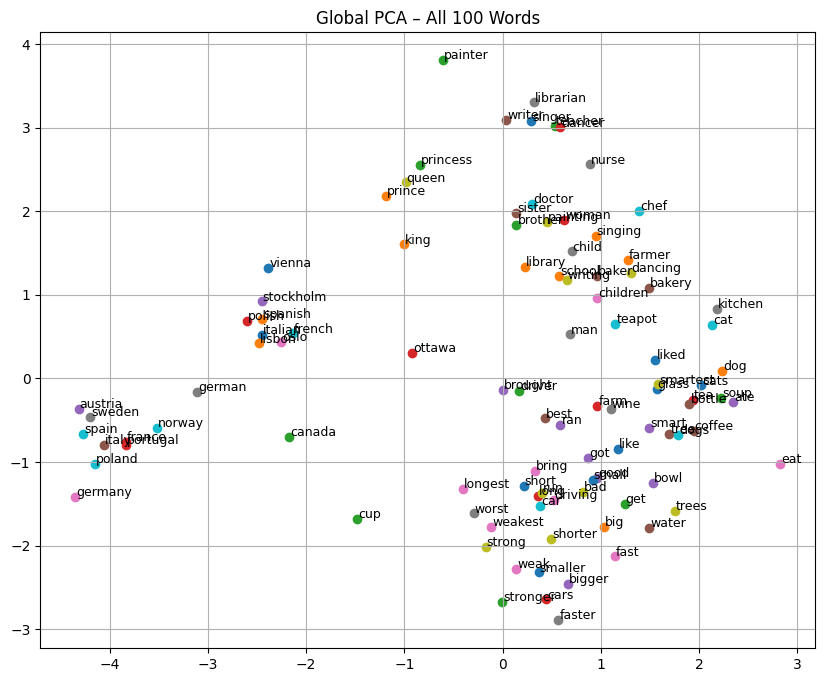

In [ ]:
plot_global_pca(word_vectors)

On the main PCA plot, we can observe several clusters — for example, a group related to countries, another with capitals, and one with profession names. This indicates that their vector representations are similar, which in turn suggests they belong to similar semantic classes. Some words, such as adjectives and certain nouns, also appear close to one another. Interestingly, capitals and nationalities ended up in the same cluster.

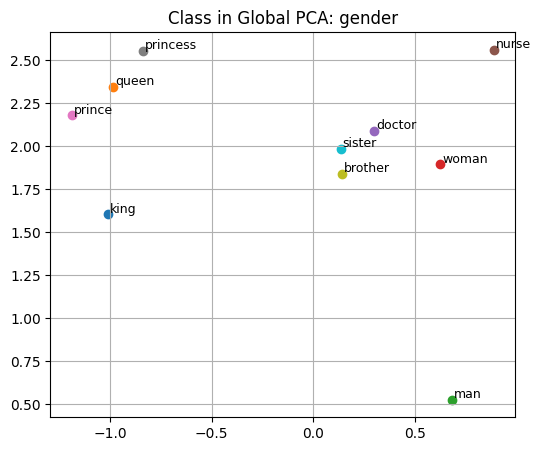

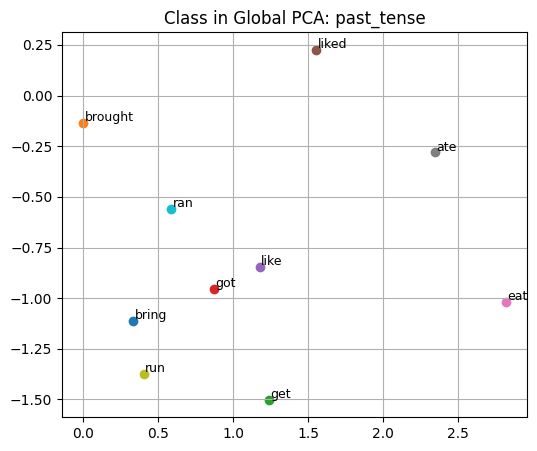

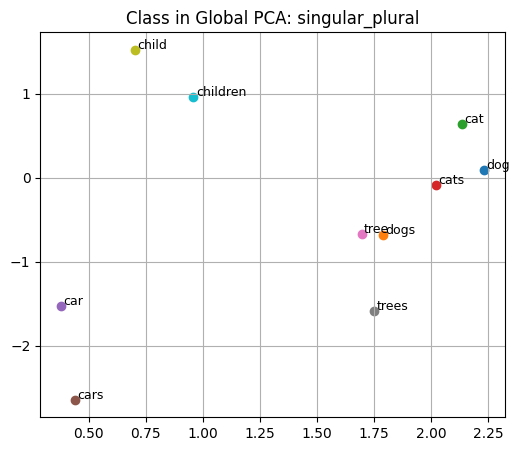

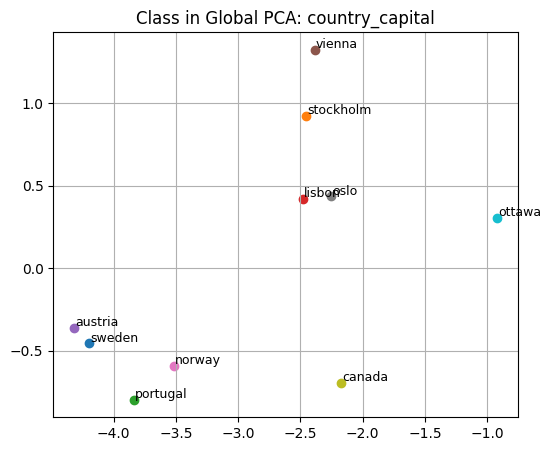

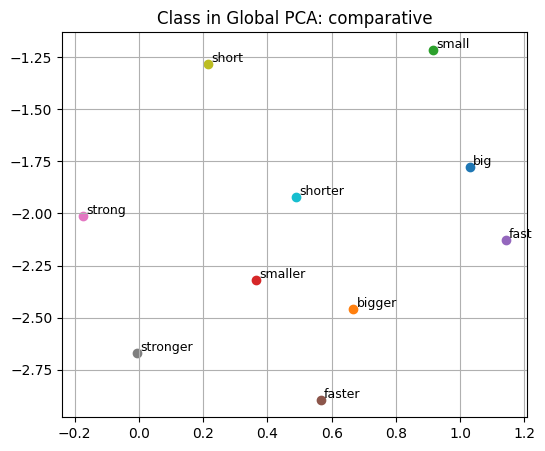

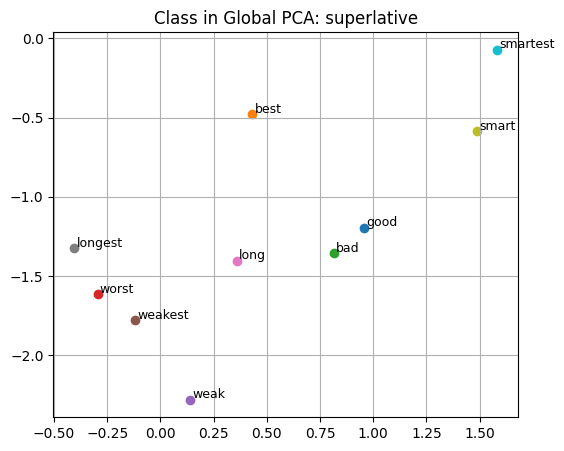

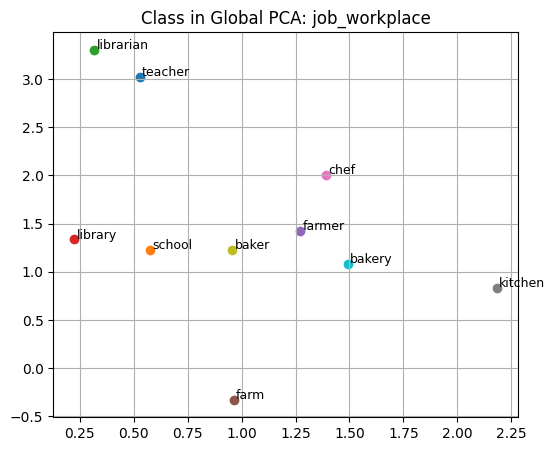

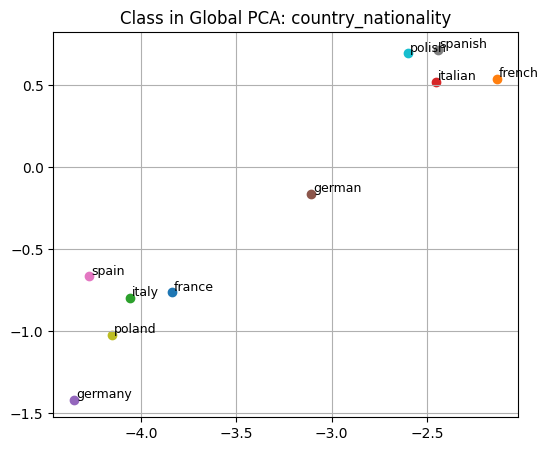

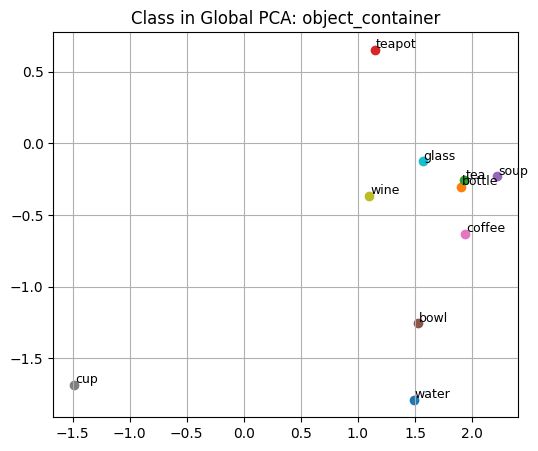

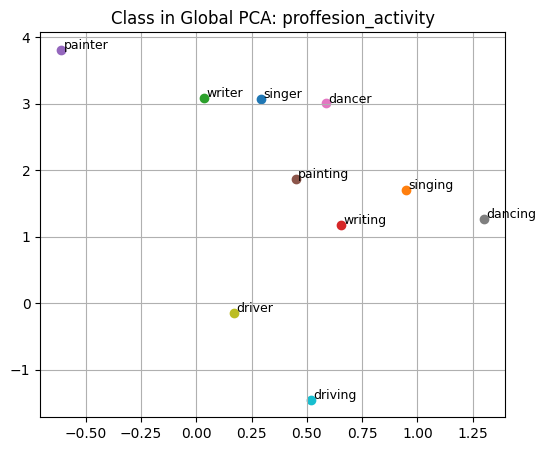

In [ ]:
plot_class_in_global_space(semantic_classes, word_vectors)

In the class-wise PCA plots projected onto the global space, we can observe varying behaviors between semantic groups. For instance, in the *comparative* class, the words are evenly distributed and form a relatively consistent structure — suggesting that the model captures adjective comparisons well. In other classes, we see outliers — for example, *cup* in the *object_container* class is located far from the rest, which may indicate ambiguity in its meaning.

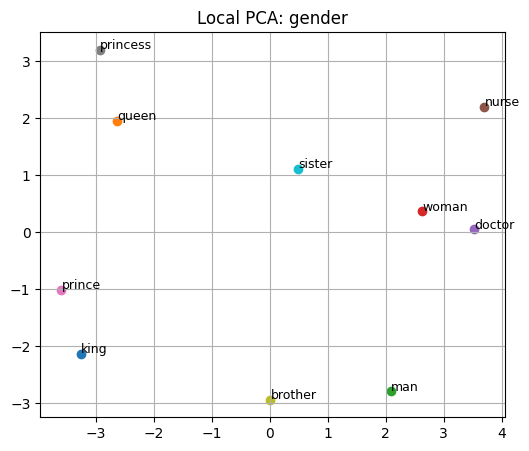

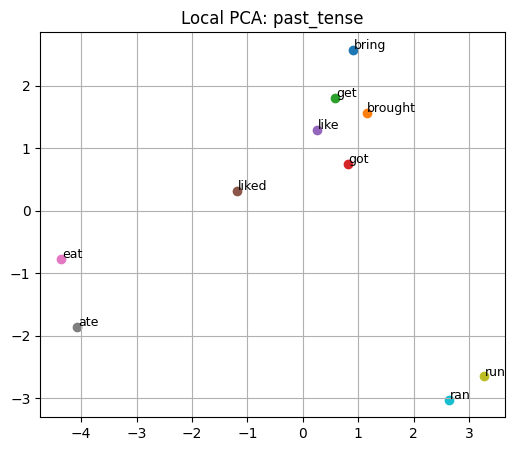

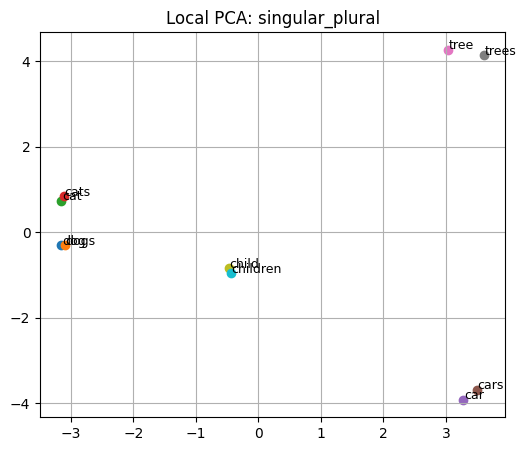

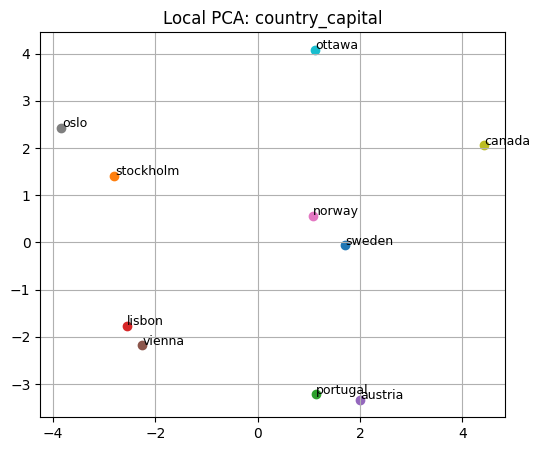

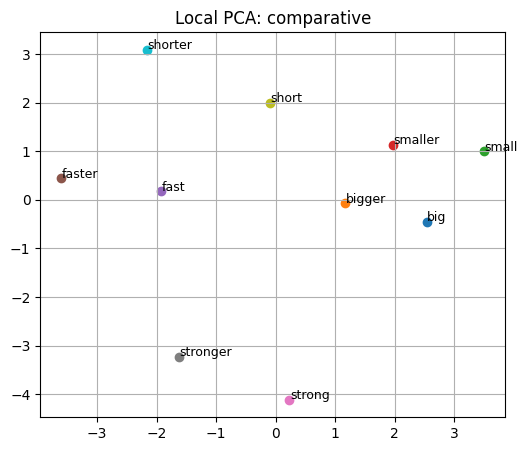

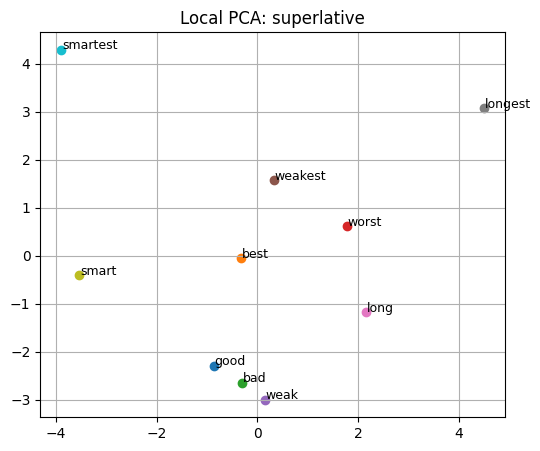

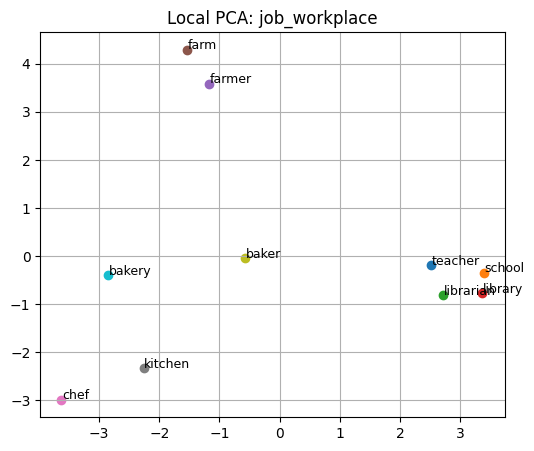

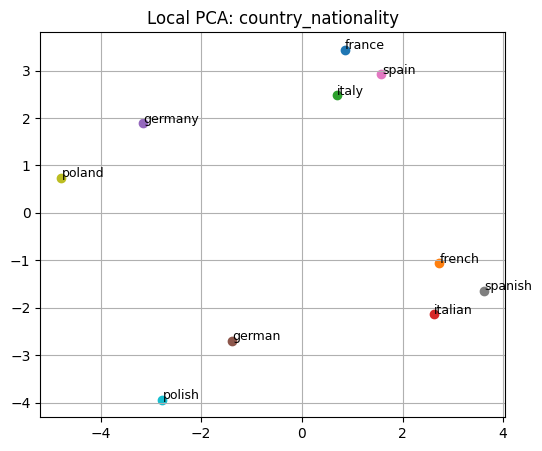

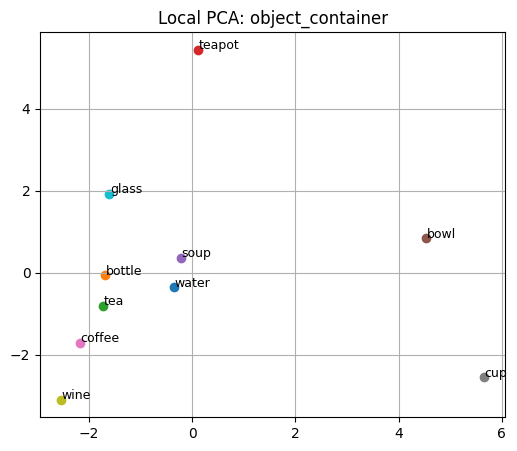

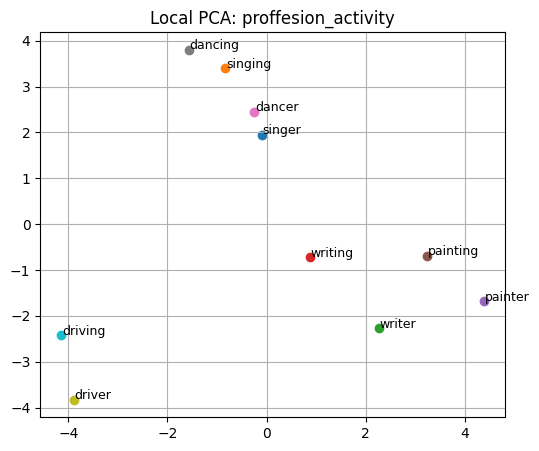

In [ ]:
plot_local_pca(semantic_classes, word_vectors)

After performing PCA within each class, we observe that clear pairs are formed in the singular_plural group. This is expected, as pairs like *cat–cats* differ only slightly in semantics and primarily morphologically. In the *job_workplace* class, pairs like *teacher–school* and *librarian–library* are placed near each other, which aligns with expected semantic associations. Additionally, we can see vector relationship, explained below.

##2. Are the vector relationships preserved?

In most classes, the differences between word pairs form a coherent geometric structure. For instance, in the gender class, the vectors `king - queen` and `man - woman` are very similar, demonstrating the regularity of that relation. A similar pattern appears in country_nationality. However, in classes that include polysemous words — such as *like* or *cup* — the vector relationships are less consistent. As a result, vector differences like `like - liked` and `eat - ate`, although representing the same tense transformation, diverge in direction and magnitude.

## 3. Does PCA capture semantic differences?

As I explained before, PCA captures general semantic differences quite well, especially in global space. Words from similar semantic fields — such as countries or capitals tend to cluster together. However, due to dimensionality reduction, some differences may be lost. In local PCA, more structure is visible within each class.

## 4. Are the closest words from the arithmetic meaningful?

In [ ]:
run_embedding_arithmetic_euclidean(semantic_classes, word_vectors)


GENDER | queen - king + man
  woman           | Euclidean distance: 5.9553
  man             | Euclidean distance: 5.9663
  queen           | Euclidean distance: 7.5165
  brought         | Euclidean distance: 8.1877
  like            | Euclidean distance: 8.1908

PAST_TENSE | brought - bring + get
  got             | Euclidean distance: 3.3382
  get             | Euclidean distance: 3.8322
  brought         | Euclidean distance: 4.8648
  like            | Euclidean distance: 5.5437
  good            | Euclidean distance: 5.6236

SINGULAR_PLURAL | dogs - dog + cat
  cat             | Euclidean distance: 4.3599
  cats            | Euclidean distance: 4.5093
  dogs            | Euclidean distance: 5.1959
  dog             | Euclidean distance: 7.2562
  brought         | Euclidean distance: 7.5228

COUNTRY_CAPITAL | stockholm - sweden + portugal
  lisbon          | Euclidean distance: 5.2241
  portugal        | Euclidean distance: 6.2321
  stockholm       | Euclidean distance: 6.9341
  vi

In some classes, such as *gender* and *country_nationality*, the arithmetic results are convincing — e.g., `queen - king + man ≈ woman`, or `french - france + italy ≈ italian`. However, in classes where the semantic difference between words is subtle or less well-defined, the analogy often breaks down. For example, the operation `dogs - dog + cat` does not reliably yield `cats`.

## 5. What kinds of relationships are captured, and what are not?

Word embeddings effectively capture regular and analogical relationships, such as *singular-plural*. However, functional or thematic associations, like: *object-container* (e.g. *tea-teapot*) are less consistently preserved, possibly because such relations are more context-dependent and less common in co-occurrence patterns.



## 6.  Are some classes better behaved than others?

Yes. Classes like *country_nationality* behave consistently and geometrically, leading to compact clusters and accurate arithmetic results. In contrast, classes involving looser semantic links — such as *object_container* show more scattered patterns and weaker arithmetic coherence.